In [19]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/ALL_Beauty_Reccomendation_with_KNNwithMean"

/content/drive/MyDrive/Machine_Learning/ALL_Beauty_Reccomendation_with_KNNwithMean


# **Data Science Life Cycle**

## **Data Understanding & Data Collection**

In [21]:
import pandas as pd
import gzip
import json

In [22]:
with gzip.open('All_Beauty.jsonl.gz', 'rb') as f:
        data_list = [json.loads(line.decode('utf-8')) for line in f]

In [23]:
df = pd.DataFrame(data_list)

In [24]:
df.head(10)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True
5,4.0,Pretty Color,The polish was quiet thick and did not apply s...,[{'small_image_url': 'https://images-na.ssl-im...,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True
6,5.0,Handy,Great for many tasks. I purchased these for m...,[],B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ,1631885519443,0,True
7,3.0,Meh,These were lightweight and soft but much too s...,[{'small_image_url': 'https://m.media-amazon.c...,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA,1634275259292,0,True
8,5.0,Great for at home use and so easy to use!,This is perfect for my between salon visits. I...,[],B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA,1627391044559,0,False
9,5.0,Nice shampoo for the money,I get Keratin treatments at the salon at least...,[],B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA,1626614511145,0,False


In [25]:
df.shape

(701528, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [27]:
df.describe()

,rating,timestamp,helpful_vote
count,701528.000000,7.015280e+05,701528.000000
mean,3.960245,1.554781e+12,0.923588
std,1.494452,8.005792e+10,5.471391
min,1.000000,9.730527e+11,0.000000
25%,3.000000,1.501616e+12,0.000000
50%,5.000000,1.571595e+12,0.000000
75%,5.000000,1.614647e+12,1.000000
max,5.000000,1.694220e+12,646.000000


In [28]:
df.isnull().sum()

,0
rating,0
title,0
text,0
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


## **Data Wrangling (Data Preparation/Cleaning)**

In [29]:
print(df.columns)

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


In [30]:
df.drop(columns=['title',	'text',	'images', 'parent_asin', 'timestamp',	'helpful_vote',	'verified_purchase'], axis =1, inplace=True)
df.head()

,rating,asin,user_id
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
1,4.0,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ
2,5.0,B07PNNCSP9,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3,1.0,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4,5.0,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ


## **Exploratory Data Analysis (EDA) & Data Visualization**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

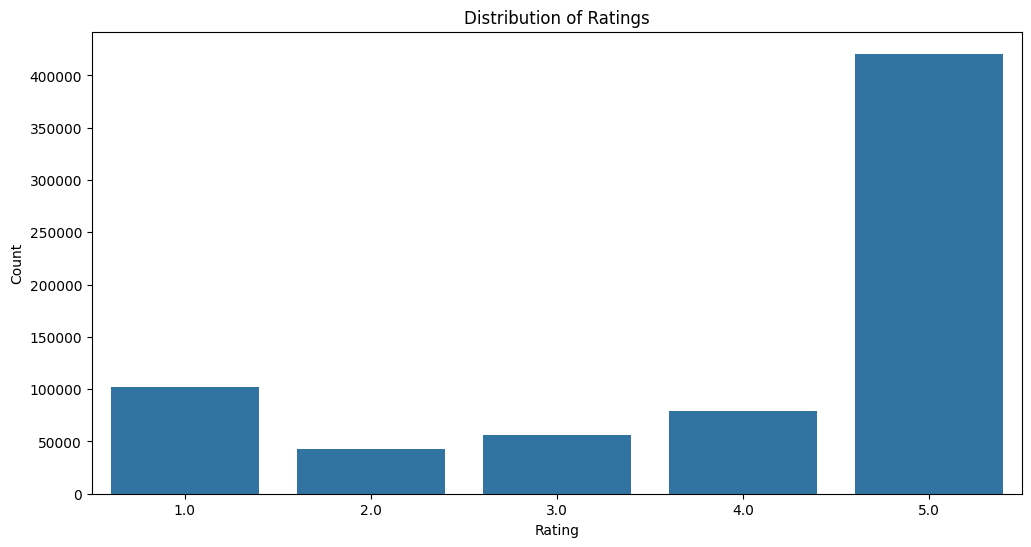

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [33]:
skewness = df['rating'].skew()
print(f"Skewness of Rating: {skewness}")

Skewness of Rating: -1.0886784130877476


Text(0, 0.5, 'Frequency')

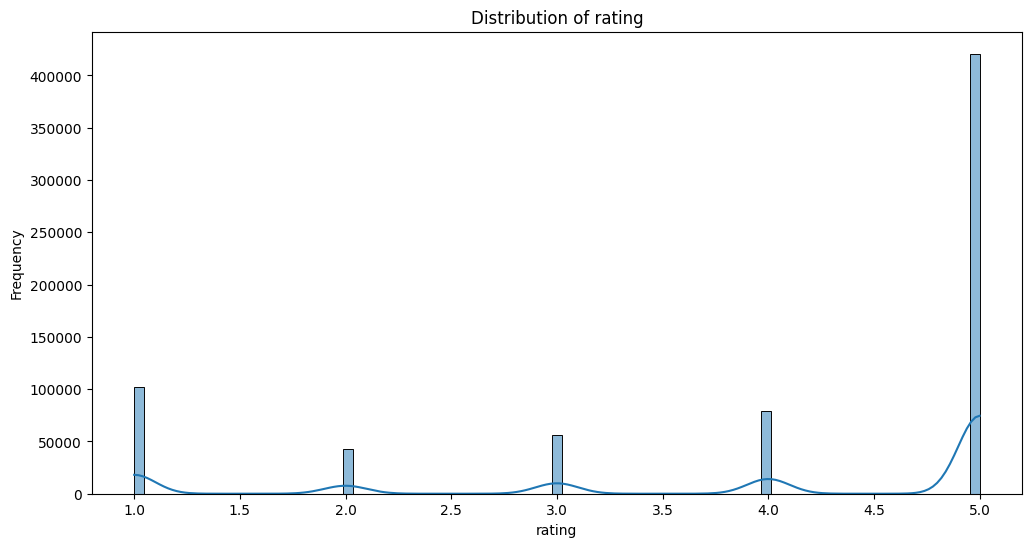

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')

## **Model Building & Evaluation**

In [35]:
!pip install scikit-surprise
!pip install numpy==1.26.4

In [36]:
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, KNNBaseline
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import joblib
import os

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# สุ่มตัวอย่างข้อมูล
df_sample = df.sample(frac=0.6, random_state=42)

# กำหนด Reader และโหลดข้อมูลไปยัง Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_sample[['user_id', 'asin', 'rating']], reader)

# กำหนด Grid ของ Hyperparameter ที่ต้องการทดสอบสำหรับ KNNBaseline
param_grid = {
    'k': [20, 40, 60], # จำนวนเพื่อนบ้าน
    'sim_options': {
        'name': ['msd', 'cosine'],
        'user_based': [True, False]
    },
    'bsl_options': {
        'method': ['als', 'sgd'],
        'reg': [1, 2]
    }
}

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุดสำหรับ KNNBaseline
print("กำลังรัน GridSearchCV เพื่อปรับจูนพารามิเตอร์...")
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# แสดงผลลัพธ์ที่ดีที่สุด
print("\n--- ผลลัพธ์จากการปรับจูน ---")
print(f"Best RMSE score: {gs.best_score['rmse']:.4f}")
print(f"Best parameters for RMSE: {gs.best_params['rmse']}")
print(f"Best MAE score: {gs.best_score['mae']:.4f}")
print(f"Best parameters for MAE: {gs.best_params['mae']}")

In [ ]:
best_model = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
best_model.fit(trainset)

# 8. บันทึกโมเดล
print("\nกำลังบันทึกโมเดล...")
joblib.dump(best_model, 'svd_best_model.pkl')
print("บันทึกโมเดลสำเร็จ!")